In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from subprocess import check_output
print(check_output(['ls','input']).decode('utf8'))

sample_submission.csv
test.csv
train.csv



In [26]:
train = pd.read_csv('input/train.csv', parse_dates=['start_date','creation_date','sell_date'])
print(train.shape)
test = pd.read_csv('input/test.csv', parse_dates=['start_date','creation_date','sell_date'])
print(test.shape)


(9366, 18)
(4801, 17)


In [27]:
train['desk_id'].fillna('DSK00000099', inplace=True)
test['desk_id'].fillna('DSK00000099', inplace=True)

train['desk_id']=train.desk_id.apply(lambda x : x[-4:])
test['desk_id']=test.desk_id.apply(lambda x : x[-4:])

In [30]:
train['office_id'] = train.office_id.apply(lambda x : x[-4:])
test['office_id'] = test.office_id.apply(lambda x : x[-4:])

In [29]:
print(train.start_date.min(), train.start_date.max())
print(test.start_date.min(), test.start_date.max())
print(train.start_date.max() - train.start_date.min())
print(test.start_date.max() - test.start_date.min())

2004-04-14 00:00:00 2017-10-26 00:00:00
2004-06-07 00:00:00 2017-10-26 00:00:00
4943 days 00:00:00
4889 days 00:00:00


In [31]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
portfolio_id,PF00001002,PF00001003,PF00001005,PF00001006,PF00001007,PF00001008,PF00001010,PF00001011,PF00001012,PF00001016
desk_id,1001,1002,1004,1005,1005,1006,1009,1009,1010,1014
office_id,1002,1001,1001,1001,1002,1001,1001,1002,1001,1001
pf_category,B,A,A,A,B,A,A,B,A,A
start_date,2004-07-20 00:00:00,2004-07-09 00:00:00,2004-07-23 00:00:00,2004-06-09 00:00:00,2004-06-09 00:00:00,2004-07-07 00:00:00,2004-07-06 00:00:00,2004-07-06 00:00:00,2004-04-19 00:00:00,2004-04-14 00:00:00
sold,1.1e+08,1.76671e+08,5.6474e+07,1.64813e+08,1.408e+08,4.8741e+07,6.05935e+07,1.342e+08,8.2929e+07,2.12476e+08
country_code,T,N,T,T,T,T,T,T,T,T
euribor_rate,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074
currency,USD,GBP,USD,USD,USD,USD,USD,USD,USD,USD
libor_rate,2.33222,5.26962,2.33222,2.33222,2.33222,2.33222,2.33222,2.33222,2.33222,2.33222


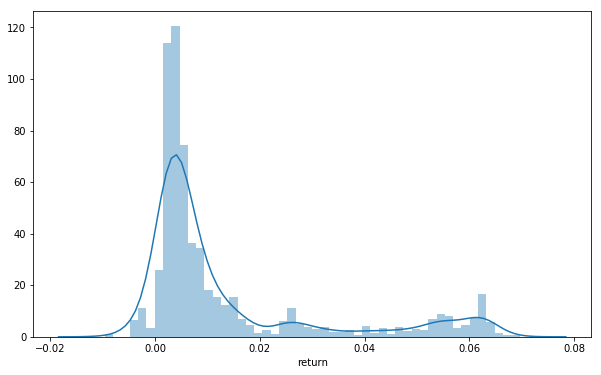

In [21]:
fig, axs = plt.subplots(figsize=(10,6))
sns.distplot(train[train['return']<0.07]['return'])
plt.show()

In [10]:
train['return'].describe()

count    9366.000000
mean        0.014100
std         0.020549
min        -0.009600
25%         0.003000
50%         0.005400
75%         0.014520
max         0.778441
Name: return, dtype: float64

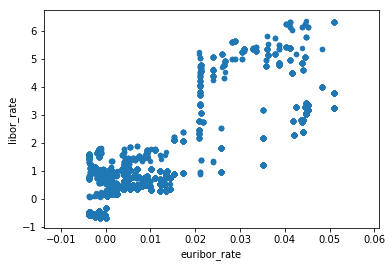

In [22]:
train.plot.scatter(x ='euribor_rate', y= 'libor_rate')

In [13]:
train.start_date.isnull().any()

False

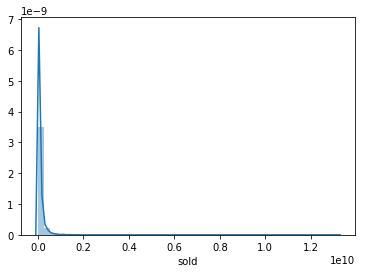

In [53]:
train.sold.fillna(np.mean(train.sold), inplace=True)
sns.distplot(train['sold'])

plt.show()

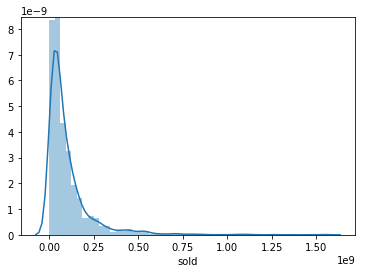

In [54]:
sns.distplot(test.sold)

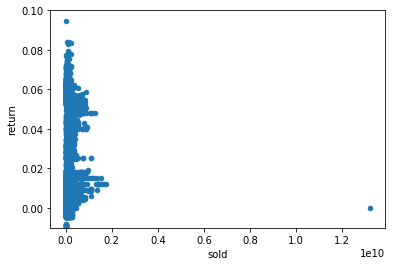

In [45]:
train.plot.scatter(x= 'sold', y ='return', ylim=(-0.01, 0.1))
plt.show()

In [34]:
test[test.libor_rate.isnull()]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
1218,PF00005034,4454,1001,D,2010-06-15,6.963946e+08,Z,0.00428,EUR,NaN,6.939511e+08,2010-06-15,NaN,2010-02-05,E,NaN,NaN
1221,PF00005049,4463,1001,A,2010-05-12,4.510000e+07,Z,0.00428,EUR,NaN,4.488801e+07,2010-06-15,NaN,2010-06-15,E,NaN,NaN
1222,PF00005050,4463,1001,A,2010-05-12,2.552000e+07,Z,0.00428,EUR,NaN,2.540004e+07,2010-06-15,NaN,2010-06-15,E,NaN,NaN
1223,PF00005052,4466,1001,D,2010-04-16,1.177363e+08,Z,0.00428,EUR,NaN,1.172851e+08,2010-06-15,NaN,2010-04-12,E,NaN,NaN
1224,PF00005055,4467,1001,D,2010-06-15,6.600000e+07,Z,0.00428,EUR,NaN,6.573537e+07,2010-06-15,NaN,2010-05-17,E,NaN,NaN
1225,PF00005056,4467,1001,D,2010-06-15,1.621400e+08,Z,0.00428,EUR,NaN,1.614899e+08,2010-06-15,NaN,2010-05-17,E,NaN,NaN
1226,PF00005061,4470,1001,D,2010-06-15,2.058100e+08,Z,0.00428,EUR,NaN,2.049224e+08,2010-06-15,NaN,2010-06-07,E,NaN,NaN
1227,PF00005064,4470,1001,D,2010-06-15,6.050000e+07,Z,0.00428,EUR,NaN,6.023907e+07,2010-06-15,NaN,2010-06-07,E,NaN,NaN
1228,PF00005066,4472,1001,D,2010-04-21,3.343560e+07,Z,0.00428,EUR,NaN,3.332032e+07,2010-06-15,NaN,2010-03-12,E,NaN,NaN
1229,PF00005069,4475,1001,D,2010-04-21,1.173260e+07,Z,0.00428,EUR,NaN,1.169215e+07,2010-06-15,NaN,2010-03-12,E,NaN,NaN


In [68]:
test[test['sold'] < 10000]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
1762,PF00006615,DSK00005311,OFF00001001,A,2011-06-20,110.0,T,0.01223,USD,0.726875,109.995600,2011-06-20,NaN,2011-06-21,A,NaN,True
2031,PF00007103,DSK00005513,OFF00001002,C,2011-08-11,1.1,M,0.01434,CHF,0.358681,1.099989,2011-08-11,NaN,2011-08-12,E,NaN,True
2853,PF00008769,DSK00006079,OFF00001001,A,2012-01-30,9900.0,T,0.01005,USD,1.063886,9899.843252,2012-01-30,NaN,2012-01-31,A,NaN,True
3576,PF00009462,DSK00006347,OFF00001001,A,2012-06-13,5720.0,T,0.00384,USD,0.967362,5719.588507,2012-06-13,NaN,2012-06-20,A,NaN,True


In [75]:
train[train['sold'] > 1500000000]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
6858,PF00008573,DSK00006018,OFF00001001,A,2012-01-03,1.648620e+09,T,0.01005,USD,1.063886,1.648572e+09,2012-01-03,NaN,2012-01-04,A,NaN,True,0.012360
6979,PF00008518,DSK00006004,OFF00001001,A,2011-12-22,1.583868e+09,T,0.01205,USD,1.000323,1.583823e+09,2011-12-22,NaN,2011-12-23,A,NaN,True,0.012360
7046,PF00008427,DSK00005978,OFF00001001,A,2011-12-09,1.546915e+09,T,0.01205,USD,1.000323,1.546750e+09,2011-12-09,NaN,2011-12-12,A,NaN,True,0.015360
7210,PF00008562,DSK00006016,OFF00001001,A,2011-12-30,1.773078e+09,T,0.01205,USD,1.000323,1.772926e+09,2011-12-30,NaN,2012-01-02,A,NaN,True,0.012360
7695,PF00015628,NaN,OFF00001002,B,2017-08-31,1.320000e+10,T,-0.00111,USD,1.650323,1.320000e+10,2017-08-31,True,2017-09-01,B,False,True,0.000024


In [73]:
test[test['sold'] > 1500000000]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
3507,PF00008564,DSK00006017,OFF00001001,A,2012-01-02,1.560212e+09,T,0.01005,USD,1.063886,1.560168e+09,2012-01-02,NaN,2012-01-03,A,NaN,True
3567,PF00008526,DSK00006007,OFF00001001,A,2011-12-23,1.553453e+09,T,0.01205,USD,1.000323,1.553275e+09,2011-12-23,NaN,2011-12-27,A,NaN,True
3667,PF00008533,DSK00006009,OFF00001001,A,2011-12-27,1.539657e+09,T,0.01205,USD,1.000323,1.539613e+09,2011-12-27,NaN,2011-12-28,A,NaN,True


In [77]:
train[train['sold'] < 1000]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
3622,PF00006613,DSK00005309,OFF00001002,B,2011-06-20,1.1,T,0.01223,USD,0.726875,1.099698,2011-06-20,NaN,2011-06-27,B,NaN,True,0.01692


In [78]:
test[test['sold'] < 1000]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
1762,PF00006615,DSK00005311,OFF00001001,A,2011-06-20,110.0,T,0.01223,USD,0.726875,109.995600,2011-06-20,NaN,2011-06-21,A,NaN,True
2031,PF00007103,DSK00005513,OFF00001002,C,2011-08-11,1.1,M,0.01434,CHF,0.358681,1.099989,2011-08-11,NaN,2011-08-12,E,NaN,True


In [11]:
test = pd.read_csv('input/test.csv', parse_dates=['start_date','creation_date','sell_date'])
print(test.shape)
test.head()

(4801, 17)


,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,2004-07-20,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,2004-07-20,NaN,2004-08-12,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,2004-07-23,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,2004-07-23,NaN,2004-07-19,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,2004-06-07,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,2004-07-26,NaN,2004-07-09,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,2004-07-16,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,2004-07-26,NaN,2004-10-19,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,2004-07-13,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,2004-07-26,NaN,2004-08-13,A,NaN,NaN


In [79]:
train.pf_category.unique()

array(['B', 'A', 'C', 'D', 'E'], dtype=object)

In [80]:
train.type.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [49]:
train['office_id'].unique()

array(['OFF00001002', 'OFF00001001'], dtype=object)

In [51]:
train['desk_id'].unique()

array(['DSK00001001', 'DSK00001002', 'DSK00001004', ..., 'DSK00006506',
       'DSK00006507', 'DSK00006543'], dtype=object)

In [69]:
train.currency.unique()

array(['USD', 'GBP', 'CHF', 'EUR', 'JPY'], dtype=object)

In [81]:
train['outcome'] = train['sold'] -train['bought']

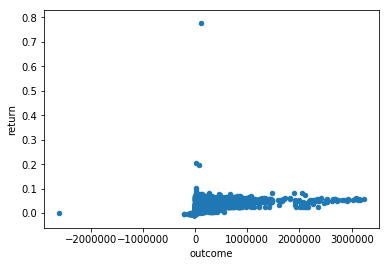

In [83]:
train.plot.scatter(x = 'outcome', y = 'return')

In [92]:
train[train['return'] > 0.2]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,outcome
1665,PF00003547,DSK00003265,OFF00001002,C,2009-04-22,5.959474e+07,M,0.01105,CHF,0.767045,5.948735e+07,2009-04-22,NaN,2009-05-12,E,NaN,NaN,0.778441,107386.498098
7096,PF00009234,DSK00006260,OFF00001001,A,2012-04-24,1.321870e+07,T,0.00417,USD,0.948752,1.320000e+07,2012-04-24,NaN,2012-04-27,A,NaN,True,0.204000,18700.000000


In [91]:
train[train['outcome'] < -1000000]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,outcome
7475,PF00015638,NaN,OFF00001002,C,2017-10-26,323058.766069,M,-0.00103,CHF,-0.515291,2.925764e+06,2017-10-26,True,2017-10-31,E,False,True,0.000038,-2.602705e+06


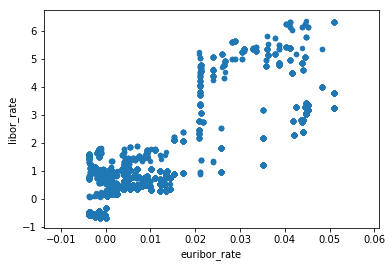

In [93]:
train.plot.scatter(x = 'euribor_rate', y = 'libor_rate')

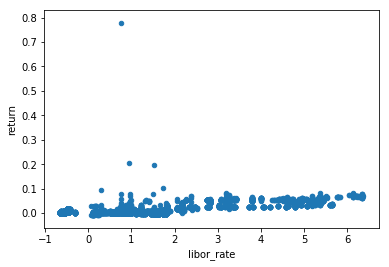

In [95]:
train.plot.scatter(x = 'libor_rate', y = 'return')

In [109]:
train['diff_crea_sell'] = (train['sell_date'] - train['creation_date']).dt.days

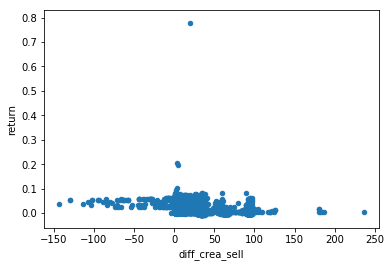

In [111]:
train.plot.scatter(x = 'diff_crea_sell', y = 'return')

In [112]:
train.hedge_value.unique()

array([nan, True, False], dtype=object)

In [113]:
train.indicator_code.unique()

array([nan, True], dtype=object)

In [114]:
train.status.unique()

array([nan, True], dtype=object)

In [127]:
train[(train['hedge_value'] == True) & (train['indicator_code'].isnull())]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,outcome,diff_crea_sell
